<a href="https://colab.research.google.com/github/brianmurerwa/Weights-and-Biases/blob/main/Logistic_regression_for_Identifying_phishing_websites_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import wandb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from urllib.parse import urlparse

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="Logistic regression for Identifying phishing websites assigment")

wandb: Currently logged in as: brianmurerwa (brianmurerwa-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
import pandas as pd



try:
    # Try reading the file with specified encoding and options
    data = pd.read_csv(
        '/content/urlset.csv',
        encoding='latin-1',
        on_bad_lines='skip',  # Skip lines with too many fields

        low_memory=False      # Process the file in chunks
    )
except Exception as e:
    print(f"Error reading file: {e}")

# Check the first few rows of the dataframe
print(data.head())







                                              domain   ranking mld_res  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000     1.0   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000     0.0   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000     0.0   
3  mail.printakid.com/www.online.americanexpress....  10000000     0.0   
4  thewhiskeydregs.com/wp-content/themes/widescre...  10000000     0.0   

  mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0        0.0      18.0  107.611111  107.277778         0.0         0.0   
1        0.0      11.0  150.636364  152.272727         0.0         0.0   
2        0.0      14.0   73.500000   72.642857         0.0         0.0   
3        0.0       6.0  562.000000  590.666667         0.0         0.0   
4        0.0       8.0   29.000000   24.125000         0.0         0.0   

   jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem  label  
0         0.0         0.0          0.8      0.79

In [ ]:
from urllib.parse import urlparse

def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain
    except Exception as e:
        return None

In [ ]:
data['domain'] = data['domain'].apply(extract_domain)

In [ ]:
data = data.dropna(subset=['domain'])

print(data['domain'].head())

0    
1    
2    
3    
4    
Name: domain, dtype: object


In [ ]:
data = pd.get_dummies(data, columns=['domain'], drop_first=True)

In [ ]:
data

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
data = data.dropna(how='all')  # Drop rows with all NaN values
data = data.dropna(axis=1, how='all')  # Drop columns with all NaN values

    # Step 3: Drop Rows and Columns with Any NaN Values
data = data.dropna()  # Drop rows with any NaN values
data = data.dropna(axis=1)  # Drop columns with any NaN values

    # Step 4: Define a Function to Check for Non-ASCII Characters
def is_ascii(s):
        try:
            s.encode('ascii')
        except UnicodeEncodeError:
            return False
        else:
            return True

    # Step 5: Drop Rows with Non-ASCII Characters
mask = data.applymap(lambda x: is_ascii(str(x))).all(axis=1)
data = data[mask]

    # Step 6: Drop Columns with Non-ASCII Characters
mask_cols = data.applymap(lambda x: is_ascii(str(x))).all(axis=0)
data = data.loc[:, mask_cols]



In [ ]:
data

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
print(data.isna())

       ranking  mld_res  mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  \
0        False    False       False     False       False       False   
1        False    False       False     False       False       False   
2        False    False       False     False       False       False   
3        False    False       False     False       False       False   
4        False    False       False     False       False       False   
...        ...      ...         ...       ...         ...         ...   
96000    False    False       False     False       False       False   
96001    False    False       False     False       False       False   
96002    False    False       False     False       False       False   
96003    False    False       False     False       False       False   
96004    False    False       False     False       False       False   

       jaccard_RR  jaccard_RA  jaccard_AR  jaccard_AA  jaccard_ARrd  \
0           False       False       False       Fals

In [ ]:
# Split the features of X and of the target y
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model

LogisticRegression()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76729 entries, 21429 to 15795
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        76729 non-null  object 
 1   mld_res        76729 non-null  object 
 2   mld.ps_res     76729 non-null  object 
 3   card_rem       76729 non-null  float64
 4   ratio_Rrem     76729 non-null  float64
 5   ratio_Arem     76729 non-null  float64
 6   jaccard_RR     76729 non-null  float64
 7   jaccard_RA     76729 non-null  float64
 8   jaccard_AR     76729 non-null  float64
 9   jaccard_AA     76729 non-null  float64
 10  jaccard_ARrd   76729 non-null  object 
 11  jaccard_ARrem  76729 non-null  object 
dtypes: float64(7), object(5)
memory usage: 7.6+ MB


In [ ]:

model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y_test

92933    0.0
95339    0.0
52565    0.0
43699    1.0
79295    0.0
        ... 
93416    0.0
3299     1.0
90397    0.0
17598    1.0
80417    0.0
Name: label, Length: 19183, dtype: float64

In [ ]:
from sklearn.metrics import auc, accuracy_score, classification_report, log_loss, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      9521
         1.0       0.50      1.00      0.67      9662

    accuracy                           0.50     19183
   macro avg       0.25      0.50      0.33     19183
weighted avg       0.25      0.50      0.34     19183



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns
%matplotlib inline

Axes(0.125,0.11;0.62x0.77)


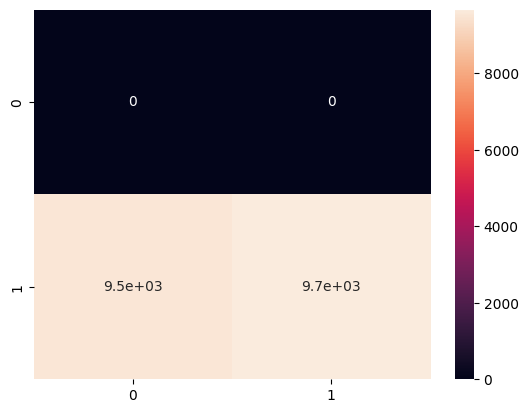

In [ ]:
print(sns.heatmap(confusion_matrix(predictions, y_test), annot=True))

In [ ]:
wandb.log({"model_params": model.get_params()})

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
wandb.log({"accuracy": accuracy})

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0 9521]
 [   0 9662]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      9521
         1.0       0.50      1.00      0.67      9662

    accuracy                           0.50     19183
   macro avg       0.25      0.50      0.33     19183
weighted avg       0.25      0.50      0.34     19183



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
wandb.finish()

accuracy,▁
accuracy,0.50368


REPORTS

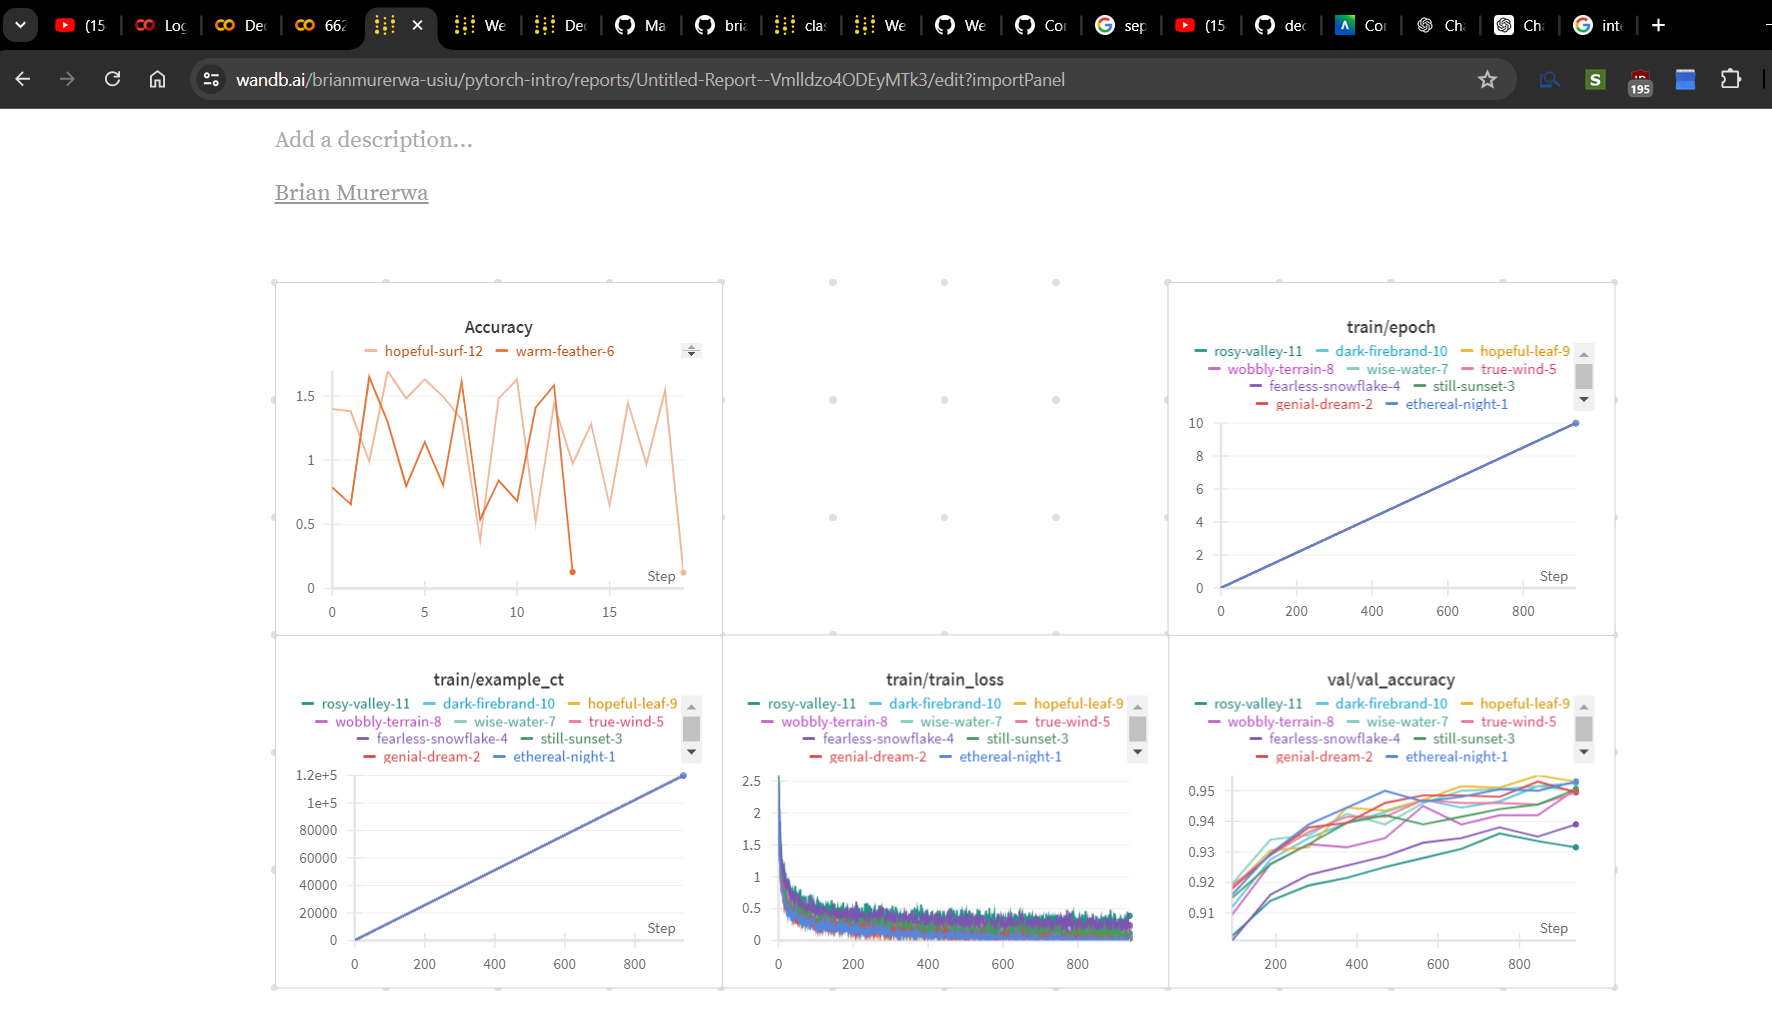

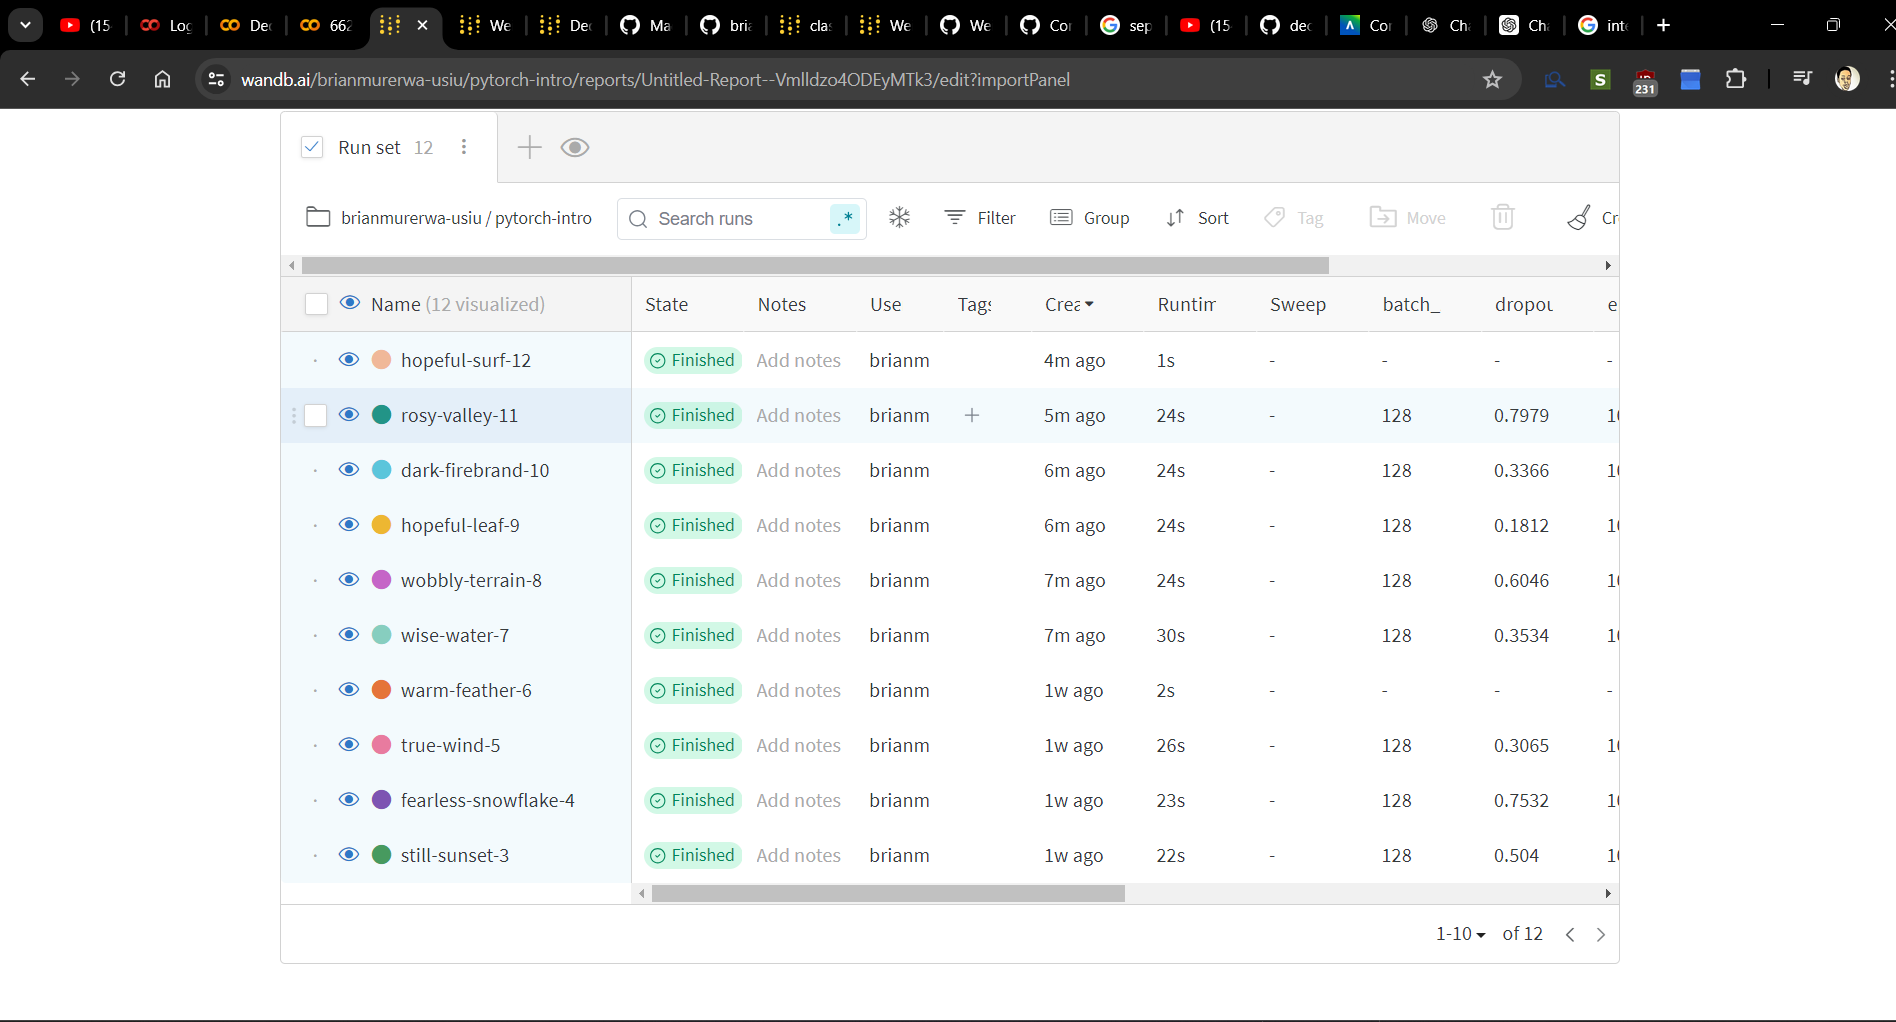